iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...


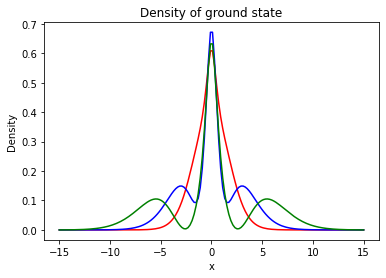

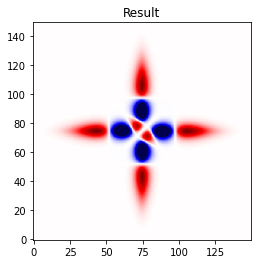

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import iDEA

#Seting up the system
a = 0
x = np.linspace(-15,15,150)
v_ext = (-2.0 / (abs(x-a) + 1.0)) + (-1.0 / (abs(x+a) + 1.0))
v_int = iDEA.interactions.softened_interaction(x)
s = iDEA.system.System(x, v_ext, v_int, electrons='uu')

#Solving for the lowest energy state.
state_1 = iDEA.methods.interacting.solve(s, k=0)
state_2 = iDEA.methods.interacting.solve(s, k=1)
state_3 = iDEA.methods.interacting.solve(s, k=2)
#Calculating the density of the state.
n_1 = iDEA.observables.density(s, state=state_1)
n_2 = iDEA.observables.density(s, state=state_2)
n_3 = iDEA.observables.density(s, state=state_3)
#Plots the results.
plt.plot(s.x, n_1, 'r-')
plt.plot(s.x, n_2, 'b-')
plt.plot(s.x, n_3, 'g-')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Density of ground state")
plt.show()

D_1 = np.sum(np.sum(abs(state_2.full)**2,axis=1),axis=-1) - np.sum(np.sum(abs(state_1.full)**2,axis=1),axis=-1)
D_2 = np.sum(np.sum(abs(state_3.full)**2,axis=1),axis=-1) - np.sum(np.sum(abs(state_1.full)**2,axis=1),axis=-1)

plt.imshow((D_2-D_1), origin='lower', cmap="seismic", vmax=np.max(D_2-D_1), vmin=-np.max(D_2-D_1))
plt.title("Result")
plt.show()